In [205]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
ride_data_df=pd.read_csv("Resources/ride_data.csv")
city_data_df=pd.read_csv("Resources/city_data.csv")

In [206]:
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [207]:
#data frame merge
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [208]:
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]

In [209]:
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [210]:
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]


In [211]:
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]


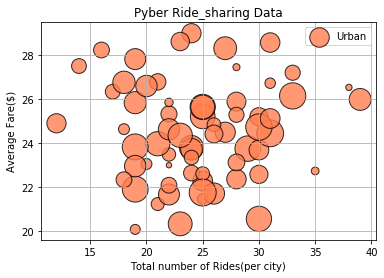

In [212]:
# scatter plot for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c="coral",edgecolor="black",linewidth=1,alpha=0.8,label="Urban")
plt.title("Pyber Ride_sharing Data")
plt.xlabel("Total number of Rides(per city)")
plt.ylabel("Average Fare($)")
plt.grid()
plt.legend()
plt.show()

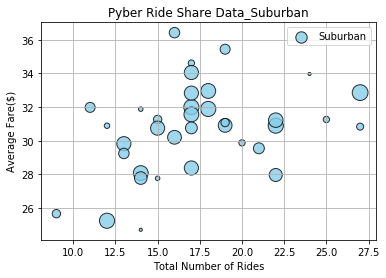

In [213]:
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c="skyblue",edgecolor="black",linewidth=1,alpha=0.8,label="Suburban")
plt.title("Pyber Ride Share Data_Suburban")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare($)")
plt.grid()
plt.legend()
plt.show()

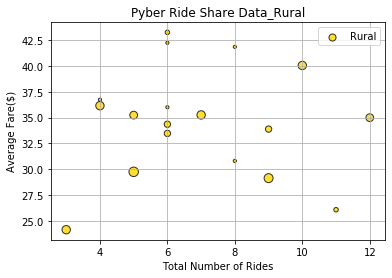

In [214]:
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,c="gold",edgecolor="black",linewidth=1,alpha=0.8,label="Rural")
plt.title("Pyber Ride Share Data_Rural")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare($)")
plt.grid()
plt.legend()
plt.show()

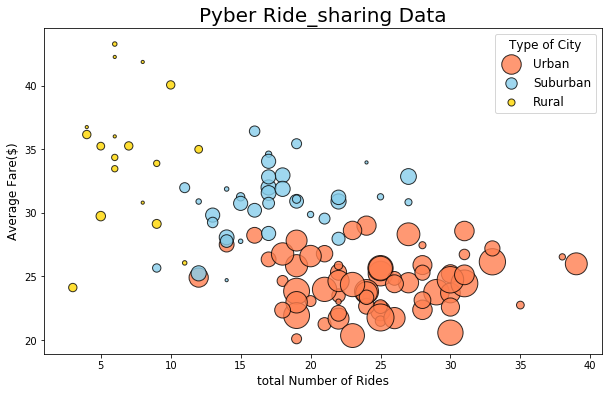

In [215]:
#Creating Subplot for all three(Urban-Suburban-Rural)
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count,c="coral",edgecolor="black",linewidth=1,alpha=0.8,label="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count,c="skyblue",edgecolor="black",linewidth=1,alpha=0.8,label="Suburban")
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count,c="gold",edgecolor="black",linewidth=1,alpha=0.8,label="Rural")

plt.title("Pyber Ride_sharing Data",fontsize=20)
plt.ylabel("Average Fare($)",fontsize=12)
plt.xlabel("total Number of Rides",fontsize=12)

pltlegend=plt.legend(fontsize="12",mode="Expanded",scatterpoints=1,loc="best",title="Type of City")
pltlegend.legendHandles[0]=[75]
pltlegend.legendHandles[1]=[75]
pltlegend.legendHandles[2]=[75]
pltlegend.get_title().set_fontsize(12)


plt.savefig("fig1.png")

In [216]:
#statistical Summary
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [217]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [218]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [219]:
#statistical for ride count
urban_ride_count.describe()
suburban_driver_count.describe()
rural_driver_count.describe()

count    18.000000
mean      4.333333
std       2.828427
min       1.000000
25%       1.250000
50%       4.000000
75%       7.000000
max       9.000000
Name: driver_count, dtype: float64

In [220]:
import numpy as np
import scipy.stats as sts

In [221]:
mean_urban_ride_count=np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count: .2f}.")

The mean for the ride counts for urban trips is  24.62.


In [222]:
median_urban_ride_count=np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count: .2f}")

The median for the ride counts for urban trips is  24.00


In [223]:
mode_urban_ride_count=sts.mode(urban_ride_count)
mode_suburban_ride_count=sts.mode(suburban_driver_count)
mode_rural_ride_count=sts.mode(rural_driver_count)


In [224]:
urban_fares=urban_cities_df["fare"]
suburban_fares=suburban_cities_df["fare"]
rural_fares=rural_cities_df["fare"]


In [225]:
mean_urban_fares=np.mean(urban_fares)
median_urban_fares=np.median(urban_fares)
mode_urban_fares=sts.mode(urban_avg_fare)

In [226]:
mean_suburban_fares=np.mean(suburban_avg_fare)
median_suburban_fares=np.median(suburban_fares)
mode_suburban_fares=sts.mode(suburban_avg_fare)

In [227]:
mean_rural_fares=np.mean(rural_avg_fare)
median_rural_fares=np.median(rural_fares)
mode_rural_fares=sts.mode(rural_avg_fare)

<function matplotlib.pyplot.show(*args, **kw)>

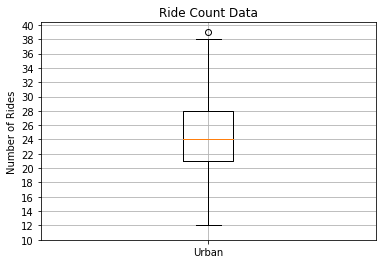

In [228]:
x_labels=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_ride_count,labels=x_labels)
ax.set_title("Ride Count Data")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show

In [229]:
##Challenge
total_ride=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [230]:
total_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [231]:
total_fares=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares=pd.Series(total_fares,name="Total Fares")
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Total Fares, dtype: float64

In [232]:
urban_driver_count=city_data_df[city_data_df["type"]=="Rural"]
urban_driver_count["driver_count"].sum()

78

In [233]:
avg_fares_driver=total_fares/total_drivers
avg_fares_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [234]:
avg_fares_ride=pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fares_ride=avg_fares_ride.rename({"fare":"Average Fare for each ride"})
avg_fares_ride=pd.Series(avg_fares_ride,name="Average Fares per Ride")
avg_fares_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: Average Fares per Ride, dtype: float64

In [235]:
pyber_summary_df=pd.DataFrame([total_ride,total_drivers,total_fares,avg_fares_ride,avg_fares_driver])
pyber_summary_df_name=pyber_summary_df.rename({"ride_id":"Total Rides","fare":"Total Fares","fare":"Average Fare per ride","driver_count":"Total Drivers","Unnamed 0":"average Fare per Driver"}).transpose()
pyber_summary_df_name

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,average Fare per Driver
type,,,,,
Rural,125.0,78.0,4327.93,34.623440,55.486282
Suburban,625.0,490.0,19356.33,30.970128,39.502714
Urban,1625.0,2405.0,39854.38,24.525772,16.571468


In [236]:
pyber_summary_df_name["Average Fares per Ride"]=pyber_summary_df_name["Average Fares per Ride"].map("${:,.2f}".format)
pyber_summary_df_name["average Fare per Driver"]=pyber_summary_df_name["average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df_name["Total Fares"]=pyber_summary_df_name["Total Fares"].map("${:,.2f}".format)
pyber_summary_df_name["Total Rides"]=pyber_summary_df_name["Total Rides"].map("{:,.0f}".format)
pyber_summary_df_name["Total Drivers"]=pyber_summary_df_name["Total Drivers"].map("{:,.0f}".format)



pyber_summary_df_name

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [237]:
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [241]:
urban_cities_df["month"]=pd.DatetimeIndex(urban_cities_df["date"]).month_name()
suburban_cities_df["month"]=pd.DatetimeIndex(suburban_cities_df["date"]).month_name()
rural_cities_df["month"]=pd.DatetimeIndex(rural_cities_df["date"]).month_name()

urban_fare_sum=urban_cities_df.groupby(["month"]).sum()['fare']
suburban_fare_sum=suburban_cities_df.groupby(["month"]).sum()['fare']
rural_fare_sum=rural_cities_df.groupby(["month"]).sum()['fare']

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

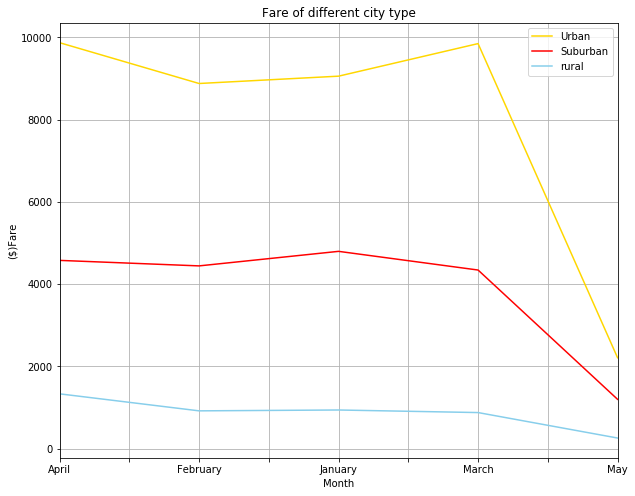

In [245]:
##line chart plotting

urban_fare_sum.plot(x="month",y="fare",figsize=(10,8),grid=True,label="Urban",c="gold")
suburban_fare_sum.plot(x="month",y="fare",figsize=(10,8),grid=True,label="Suburban",c="red")
rural_fare_sum.plot(x="month",y="fare",figsize=(10,8),grid=True,label="rural",c="skyblue")

plt.title("Fare of different city type")
plt.ylabel("($)Fare")
plt.xlabel("Month")
plt.legend()